** **
## Project Pulse, AI and Support Systems
** **

Support systems house valuable data and information that can be leveraged to better inform customer education teams on how useful their content is along with recognized gaps in content topics that lead to end user friction signaled by the request for help. However, due to the sheer volume of support tickets and the fact that these support systems are siloed and designed for support agents, it’s challenging and time consuming for customer education personnel to access and mine through large volumes of tickets necessary to extract meaningful information that informs content strategy.

#### Goal
One of the desired goals for Project Pulse is to surface valuable insights that are buried and hidden in support systems in an easy and consumable manner.  Machine learning and artificial intelligence technologies can be leveraged to help us understand what’s contained in these large contextual data sets, and provide answers to questions that will lead to help making informed decisions around training and education content strategies. 

#### Questions to be Answered
Below are some of the questions that would be valuable to answer and by doing so, help inform decisions related to content and education strategy.  By product friction, we’re defining simply as an end-user interruption in a performed task that requires an action of seeking help or assistance in order to complete a desired task.

* Are customers experiencing an increase or decrease in product friction? 

* Where in the product are customers experiencing increases and decreases in friction?

* Which customer accounts are experiencing high levels of product friction?

* Are there commonalities or themes that customers are experiencing friction?

* Is there a correlation between new users and product friction?

* What is the volume and frequency of content being updated?

* What product areas or facets of content are being updated or newly created?

* Is there a correlation between content being updated/created and product friction?

* Are customers finding the content useful?

* What content is most and least useful?

* Is the content reducing the number of support tickets being submitted? 

#### Anatomy of a Support Ticket
Most support systems contain similar data structures and provide APIs to access and extract various elements.  Below is Zendesk’s ticket structure:

* System Fields https://support.zendesk.com/hc/en-us/articles/203661506#topic_drw_ft1_3nb
* Status
* Type (Question, Incident, Problem, Task)
* Priority (low, normal, high, urgent)
* Subject
* Description (When an end user submits a support request via email, the body of the email request is used as the description. The description becomes the first comment in the ticket)
* Assignee
* Requester

Fields are also added (aka custom fields) that provide further classification. For example, in our Zendesk implementation, we’ve added a very important classifier called Product Facet that provides a drop down selector enabling the agent and/or submitter to select where in the product the request is originating or related to:
  
Here are some key fields that our Zendesk implementation utilizes:
* Product Facet (reporting, panorama, users, SCORM, SSO, etc)
* Brand (product, security, VOC)
* Form (support request, instance request)
* Tags

#### Applying Machine Learning & Artificial Intelligence
Many of the above questions can be answered without the application of machine learning. Where machine learning can be applied is in the analysis of the large text body of the ticket - typically the the Subject and Description fields. These fields are open ended inputs, constructed by the end user and support agent, and can be analyzed for common key words, phrases, and topics across a large set of tickets. ML analysis can be applied to then abstract and visually present meaningful insights that lead to identifying the most common friction points being experienced by end users. Within each facet area of a product (e.g. Reporting) the goal is to identify and surface common topics where users are experiencing friction, alleviating content creators and instructional designers from having to sift through hundreds and thousands of support tickets in order to extract meaningful information that leads to education improvements.

To accomplish the goal, natural language processing (NLP), text analysis and topic modeling algorithms will be applied to key fields in the support ticket such as:

* Subject
* Description (interactions between agent and end submitter) 

#### NLP Text Analysis & Keyword Extraction
Keyword Extraction is one of the simplest ways to leverage text mining for providing insights. It can automatically identify the most representative terms in text and documents. Such extracted keywords can be used for various applications. They can be used to summarize the underlying theme of a large document with just a few terms or in our case, key phrases and topic of a support ticket or a collection of support ticket submissions. 

For keyword extraction, all algorithms follow a similar model. A document is preprocessed to remove less informative words (stop words, punctuations) and then split into terms. Candidate keywords such as words and phrases are chosen. A score is determined for each candidate keyword using an algorithm. The highest-ranking keywords are selected and post-processing such as removing near-duplicates is applied. Finally, the algorithm returns the top N ranking keywords as output.  Popular keyword and phrase extraction algorithms include:

* Naive Counting
* Term Frequency Inverse Document Frequency (TF-IDF)
* Rapid Automatic Keyword Extraction (RAKE)
* Yet Another Keyword Extractor (YAKE)

#### Topic Modeling (Latent Dirichlet Allocation (LDA)
In natural language processing, the Latent Dirichlet Allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. 

Latent (la·​tent) adjective: present and capable of emerging or developing but not now visible, obvious, active, or symptomatic

Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents. Unsupervised machine learning doesn’t require a predefined list of tags or training data that’s been previously classified by humans, so it’s very low effort and does not require human interpretation of the body of text in order to produce results, therefore it’s a quick and easy way to start analyzing data. By detecting patterns such as word frequency and distance between words, a topic model clusters feedback that is similar, and words and expressions that appear most often. With this information, you can quickly deduce what each set of text blocks are talking about - in our case, the main topic in a support ticket from the interaction between a support agent and the end user who is experiencing friction and seeking help. 

##### To Train or Not to Train?
Our application of machine learning will be made simpler due to the fact that support tickets are already trained, meaning that tickets are humanly categorized and tagged by support agents that are already doing much of the heavy lifting for us. In doing so, we can apply machine learning attention more specifically - to only those tickets related to end-user friction (e.g. ticket types equaling Question,  and then further categorized by Product Facet). So essentially, our ML processing will be uncovering sub-topics within an already categorized topic such as reporting or panorama. 

Additionally, our tech support agents will be further classifying tickets in product facet areas using finer grained tags, which we can also utilize to further segment “like” tickets prior to analyzing them with ML, or simply using these tags without applying any machine learning.  But in many cases outside our own use case, this fine grained tagging won’t be in place across our customer bases, therefore an unsupervised approach using topic modeling will be required.  

##### PII
Support tickets do contain PII - much in the body of the description as many of the tickets originate via email that contains signatures with name, email, phone numbers, addresses in the footer of the email.. We do not want to store any PII that is contained in the ticketing system in Ti (nor do we need to).  Account-level info is sufficient enough.  Data therefore must be cleansed of PII during the ETL process and storage in our warehouse. 



** **
## Proof of Concept 
** **
Below is a python example that applies LDA topic modeling and analysis to a small sample (~10) of Zendesk support tickets extracted from our system. The support tickets are all of type=Question and have been categorized as "Reporting" for the product facet.  The application utilizes a number of open source libraries, with the gensim library utilized for the corpus, dictionary and topic modeling analysis. 

** **
#### Download and install libraries
** **

In [1]:
# !pip install wordcloud

In [2]:
# !pip install gensim

In [3]:
# !pip install python-Levenshtein

In [4]:
# !pip install pyLDAvis

** **
#### Load Zendesk Data 
** **

In [5]:
# Importing modules
import pandas as pd
import os

# os.chdir('..')

# Read data into zen_des
zen_des = pd.read_csv('zendesk_tickets_reporting.csv')

# Print head
zen_des.head()


,ticket_no,facet,description
0,4321,reporting,Hello We would like to know if it is possible ...
1,8763,reporting,Trying to see when the learners registered for...
2,9633,reporting,Which report do I use to see all the users tha...
3,7633,reporting,"Hello, I'm trying to create a report that show..."
4,8733,reporting,how do I create a report that contains all of ...


** **
#### Cleanse Data 
** **

In [6]:
# Remove the columns from CSV
zen_des = zen_des.drop(columns=['ticket_no', 'facet'], axis=1)

# Print out the first rows of papers
zen_des.head()

,description
0,Hello We would like to know if it is possible ...
1,Trying to see when the learners registered for...
2,Which report do I use to see all the users tha...
3,"Hello, I'm trying to create a report that show..."
4,how do I create a report that contains all of ...


** **
##### Remove Punctuation & Lower Casing
** **

In [7]:
# Load the regular expression library
import re

# Remove punctuation
zen_des['description_processed'] = \
zen_des['description'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
zen_des['description_processed'] = \
zen_des['description'].map(lambda x: x.lower())

# Print out the first rows of the zend desk ticket descriptions
zen_des['description_processed'].head()

0    hello we would like to know if it is possible ...
1    trying to see when the learners registered for...
2    which report do i use to see all the users tha...
3    hello, i'm trying to create a report that show...
4    how do i create a report that contains all of ...
Name: description_processed, dtype: object

** **
#### Prepare the text for LDA Analysis
** **

In [8]:
import gensim
from gensim.utils import simple_preprocess
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'reporting', 'use', 'see','report', 'reports','how','help', 'want'])
# print (stopwords.words('english'))

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

# convert sentences to words
data = zen_des.description_processed.values.tolist()
data_words = list(sent_to_words(data))


# remove stop words
data_words = (remove_stopwords(data_words))

print(data_words[:1][0][:30])



['hello', 'would', 'like', 'know', 'possible', 'students', 'attended', 'class', 'long', 'attended', 'inside', 'ti']


** **
#### Visual Representation using a Wordcloud
** **

In [9]:
# convert scrubbed data_words list to a concantenated string for wordcloud processing 
outer_list = data_words
res_string = ""
for innerlist in outer_list:
    res_string+= ' '.join(innerlist)+" "
# print(res_string)

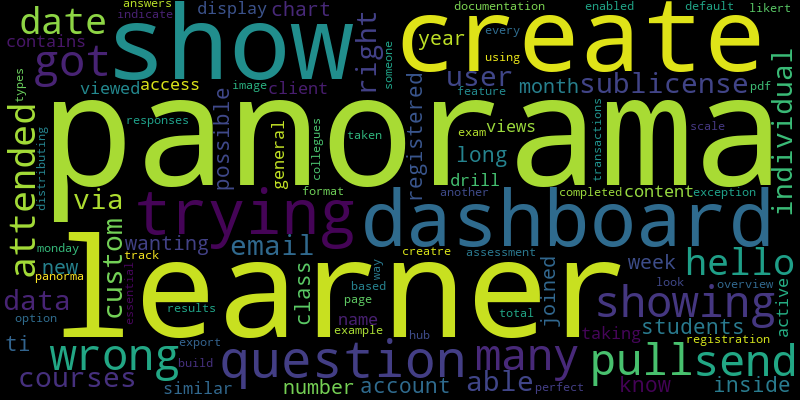

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="black", max_words=100, contour_width=5, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(res_string)

# Visualize the word cloud
wordcloud.to_image()

** **
#### Create the Corpus and Dictionary
** **

In [11]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


** **
#### Perform LDA model tranining 
** **

In [12]:
from pprint import pprint

# number of topics
num_topics = 5

# number of iterations
num_iterations = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,iterations=num_iterations,
                                       num_topics=num_topics)

# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.046*"send" + 0.038*"panoramas" + 0.025*"every" + 0.025*"example" + '
  '0.025*"like" + 0.025*"via" + 0.025*"monday" + 0.025*"collegues" + '
  '0.025*"email" + 0.024*"able"'),
 (1,
  '0.056*"create" + 0.050*"learners" + 0.048*"panorama" + 0.032*"trying" + '
  '0.027*"many" + 0.022*"individual" + 0.020*"shows" + 0.018*"email" + '
  '0.018*"distributing" + 0.018*"contains"'),
 (2,
  '0.049*"panorama" + 0.033*"attended" + 0.028*"data" + 0.028*"sublicense" + '
  '0.018*"access" + 0.018*"name" + 0.018*"general" + 0.018*"client" + '
  '0.018*"users" + 0.018*"panorma"'),
 (3,
  '0.071*"dashboard" + 0.042*"custom" + 0.038*"shows" + 0.037*"build" + '
  '0.037*"hub" + 0.037*"creatre" + 0.037*"documentation" + 0.011*"create" + '
  '0.009*"panoramas" + 0.008*"many"'),
 (4,
  '0.034*"learners" + 0.026*"questions" + 0.025*"wrong" + 0.025*"pull" + '
  '0.025*"showing" + 0.023*"got" + 0.017*"panorama" + 0.017*"option" + '
  '0.017*"shows" + 0.017*"scale"')]


** **
#### Analyze the LDA model using LDAvis (a python-based visualization application)
** **

In [ ]:
# import pyLDAvis.gensim
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/Users/toddboes/Documents/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, R=30, sort_topics=True)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/Users/toddboes/Documents/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

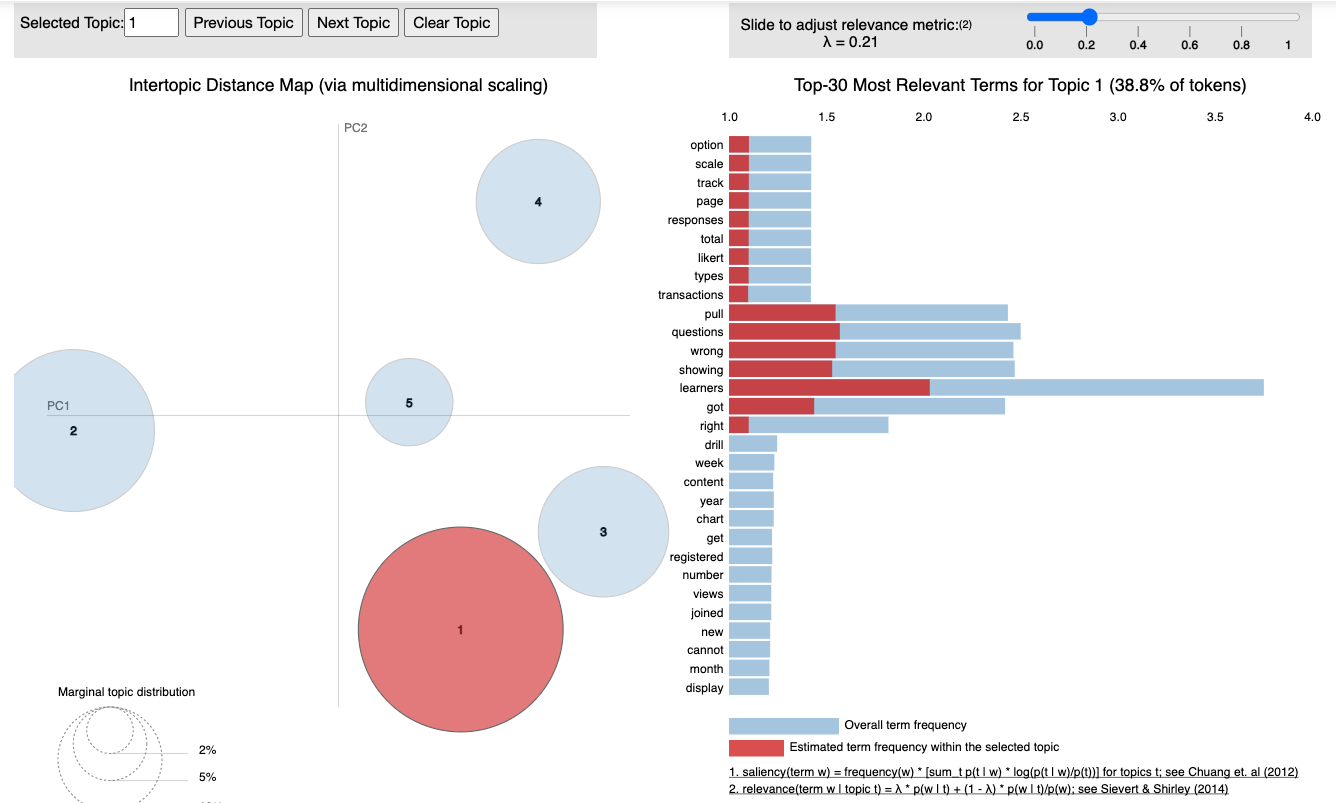

### LDAvis Explained

There are essentially four sets of visual elements that can be displayed, depending on the state of the visualization.

1. Default Topic Circles: K circles, one to represent each topic, whose areas are set
to be proportional to the proportions of the topics across the N total tokens in the
corpus. The default topic circles are displayed when no term is highlighted.
2
2. Red Bars: K ×W red horizontal bars, each of which represents the estimated number
of times a given term was generated by a given topic. When a topic is selected, we
show the red bars for the R most relevant terms for the selected topic, where R = 30
by default (see Sievert and Shirley (2014) for the definition of relevance).
3. Blue Bars: W blue horizontal bars, one to represent the overall frequency of each
term in the corpus. When no topic is selected, we display the blue bars for the R most
salient terms in the corpus, and when a topic is selected, we display the blue bars for
the R most relevant terms. See Chuang et al. (2012) for the definition of the saliency
of a term in a topic model.
4. Topic-Term Circles: K × W circles whose areas are set to be proportional to the
frequencies with which a given term is estimated to have been generated by the topics.
When a given term, w, is highlighted, the K default circles transition (i.e. their areas
change) to the K topic-term circles for term w.

Parameters of LDA
* Alpha parameter is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.
* Beta parameter is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

** **
### View the HTML Interactive Visualization  
https://rtboes.github.io/
** **

##  References & Resources

###### Topic Modeling
1. Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
2. Distributed Strategies for Topic Modeling. https://www.ideals.illinois.edu/bitstream/handle/2142/46405/ParallelTopicModels.pdf?sequence=2&isAllowed=y
3. Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
4. A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf

###### Open Source Topic Modeling Libraries (Python & R)
* Gensim - https://radimrehurek.com/gensim/
* NLTK - https://www.nltk.org/
* SpaCy - https://spacy.io/
* Scikit - https://scikit-learn.org/stable/
* Topicmodels - https://cran.r-project.org/web/packages/topicmodels/index.html

###### Cloud Services & APIs
* Amazon Comprehend - https://docs.aws.amazon.com/comprehend/latest/dg/topic-modeling.html
* IBM Watson
* Google Cloud NLP
* Azure Cognitive Text Analytics
* Aylien
* MeaningCloud
* BigML
* MonkeyLearn


###### Zendesk Resources
* Support APIs
https://developer.zendesk.com/rest_api/docs/support/tickets
https://developer.zendesk.com/rest_api/docs/support/ticket_comments
* Help Center APIs
https://developer.zendesk.com/rest_api/docs/help_center/votes


###### Help Guide Search Report
https://support.zendesk.com/hc/en-us/articles/203664476-analyzing-help-center-search-results-professional-and-enterprise-?page=3
Note: in the Zendesk community comments Zendesk states that there are no current plans of making the search queries available via API
